<a href="https://colab.research.google.com/github/PrabhatKumar-Data/DataScienceProjectCodes/blob/main/Cotton_diseaseResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)


In [21]:
!nvidia-smi

Thu Feb  4 21:41:29 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    34W /  70W |   8157MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [23]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [24]:
# re-size all the image to this
IMAGE_SIZE = [224,224]



In [25]:
# Tmprt the ResNet50 Library as shown and add perprocessing layer to the front of 
# Here we will be using imganet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [27]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton/train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs = resnet.input, outputs= prediction)

In [30]:
# view the  strutrue of the model

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [31]:
# tell the model what cost and optimization method to use

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
# USe the Image Data GEnerator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(rescale = 1./255,
                                shear_range = 0.2,
                                horizontal_flip = True)

test_data = ImageDataGenerator(rescale = 1./255)

In [33]:
# Make sure you provide the same target size as initialised for the image size
training_set = train_data.flow_from_directory('/content/drive/MyDrive/Cotton/train',
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [34]:
test_set = test_data.flow_from_directory('/content/drive/MyDrive/Cotton/test',
                                         target_size = (224,224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs= 20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 566s 9s/step - loss: 2.9029 - accuracy: 0.3912 - val_loss: 1.0535 - val_accuracy: 0.5556
Epoch 2/20
62/62 [==============================] - 35s 561ms/step - loss: 0.9415 - accuracy: 0.6111 - val_loss: 0.9192 - val_accuracy: 0.7222
Epoch 3/20
62/62 [==============================] - 35s 563ms/step - loss: 1.0434 - accuracy: 0.5977 - val_loss: 0.7824 - val_accuracy: 0.6667
Epoch 4/20
62/62 [==============================] - 35s 561ms/step - loss: 0.6985 - accuracy: 0.7153 - val_loss: 0.8969 - val_accuracy: 0.6667
Epoch 5/20
62/62 [==============================] - 35s 558ms/step - loss: 0.9065 - accuracy: 0.6350 - val_loss: 0.6573 - val_accuracy: 0.7222
Epoch 6/20
62/62 [==============================] - 35s 565ms/step - loss: 0.8026 - accuracy: 0.7092 - val_loss: 1.2518 - val_accuracy: 0.7222
Epoch 7/20
62/62 [==============================] - 35s 561ms/step - loss: 0.7889 - accuracy: 0.7173 - val_loss: 0.7116 - val_accuracy: 0.6667
E

In [36]:
import matplotlib.pyplot as plt

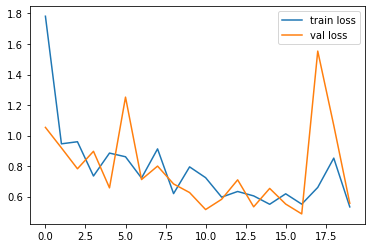

<Figure size 432x288 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

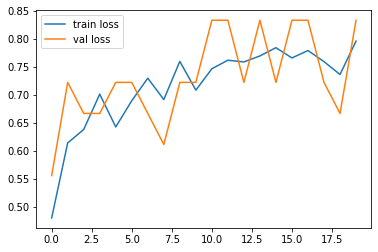

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train loss')
plt.plot(r.history['val_accuracy'], label='val loss')
plt.legend()
plt.show()
plt.savefig('AccuracyVal_accuracy')

In [39]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')
